In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [2]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [4]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


Featurers Scalling

In [8]:
from sklearn.preprocessing import StandardScaler
x=df[['Years of Experience']].values
y=df[['Salary']].values

sc_x=StandardScaler()
sc_y=StandardScaler()

x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y)

Flatten y for SVR

In [9]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

Train SVR Model

In [12]:
y_scaled=y_scaled.ravel()

In [13]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

In [11]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=100,epsilon=0)
svr.fit(x_scaled,y_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, epsilon=0)

In [ ]:

predictions and Inverse Scalling

In [14]:
y_pred_scaled=svr.predict(x_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [15]:
y_pred_scaled

array([-0.47193587, -0.98932521,  1.18926307, ..., -0.76356949,
        1.03573807, -1.33212129])

In [16]:
y_pred

array([[ 90417.13068984],
       [ 63108.16042983],
       [178098.93802879],
       ...,
       [ 75024.05351607],
       [169995.54441764],
       [ 45014.61418287]])

Visualization:Actual vs Predicted

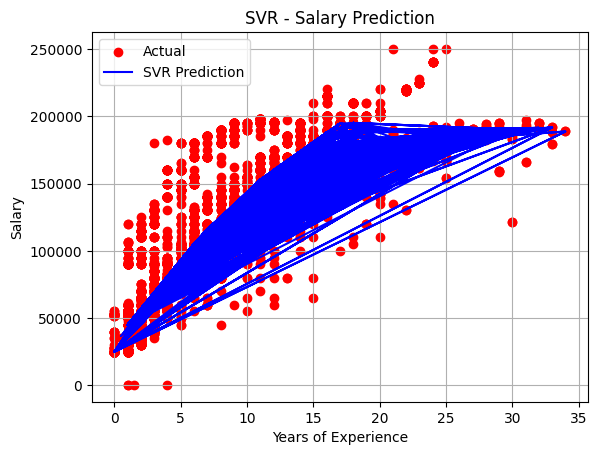

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_pred,color='blue',label='SVR Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('SVR - Salary Prediction')
plt.grid(True)
plt.legend()
plt.show()

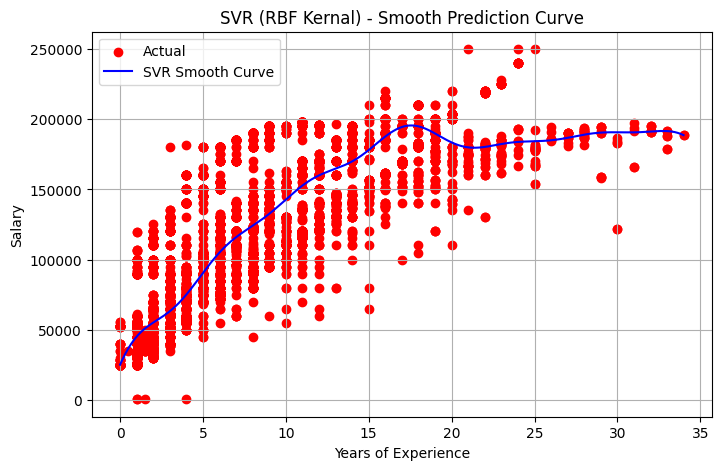

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#Create a fine grid between min and max years experences
X_grid = np.arange(min(x.ravel()), max(x.ravel()), 0.01)
X_grid = X_grid.reshape(-1,1)

#Scale X_grid just like training data
X_grid_scaled = sc_x.transform(X_grid)

#Predict on the grid and inverse transform the results
y_grid_scaled = svr.predict(X_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

#Plot
plt.figure(figsize=(8,5))
plt.scatter(x,y,color='red',label='Actual')
plt.plot(X_grid,y_grid,color='blue',label='SVR Smooth Curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('SVR (RBF Kernal) - Smooth Prediction Curve')
plt.grid(True)
plt.legend()
plt.show()

Evaluate Model Performance

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 770714094.6925964
Root Mean Squared Error (RMSE): 27761.73796239343
R-squared (R2) Score: 0.7233583266653186



Compare Kernels Using Code

R2 Score for linear Kernel: 0.6326106233128987


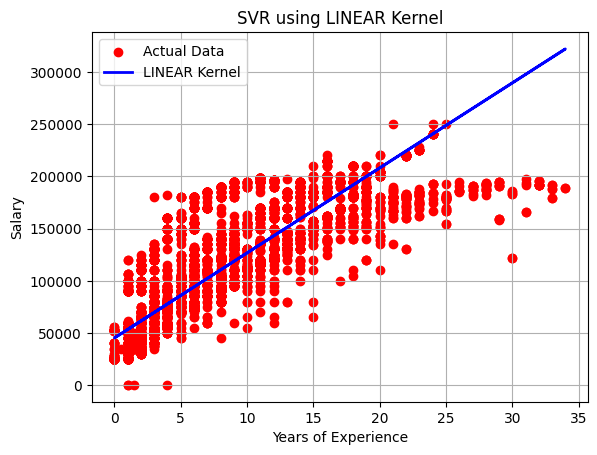

R2 Score for poly Kernel: 0.05777366791361349


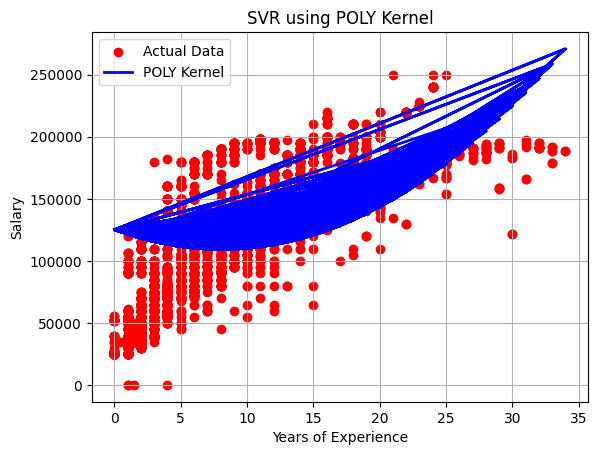

R2 Score for rbf Kernel: 0.7249285879306625


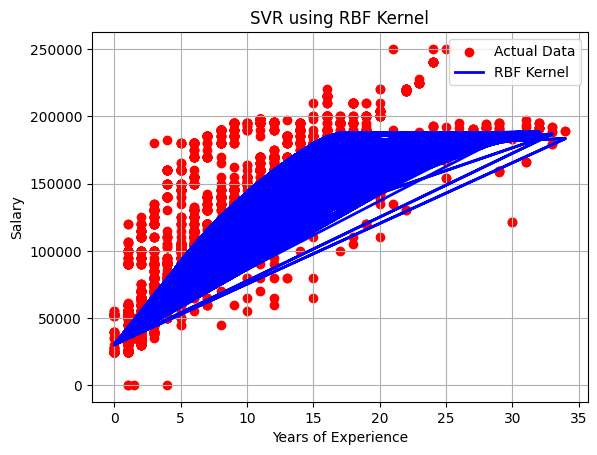

In [23]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Load and scale data
X = df[['Years of Experience']].values
y = df[['Salary']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_x.fit_transform(X)
y_scaled = sc_y.fit_transform(y)
y_scaled = y_scaled.ravel() # Flatten y_scaled for SVR

# 2.Define kernels
kernels=['linear','poly','rbf']

# 3.Train and evaluate each kernel
for kernel in kernels:
    if kernel=='poly':
        model=SVR(kernel=kernel,degree=2)
    else:
        model=SVR(kernel=kernel)

    model.fit(X_scaled,y_scaled)

    # Predict for training data
    y_pred_scaled = model.predict(X_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

    # Evaluation
    score=r2_score(y,y_pred)
    print(f'R2 Score for {kernel} Kernel: {score}')

    # Plot (options)
    plt.figure() # Create a new figure for each plot
    plt.scatter(X,y,color='red',label='Actual Data')
    plt.plot(X,y_pred,color='blue',label=f'{kernel.upper()} Kernel', linewidth=2)
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title(f'SVR using {kernel.upper()} Kernel') # Corrected f-string
    plt.grid(True)
    plt.legend()
    plt.show()

Try Different C and epsilon Values

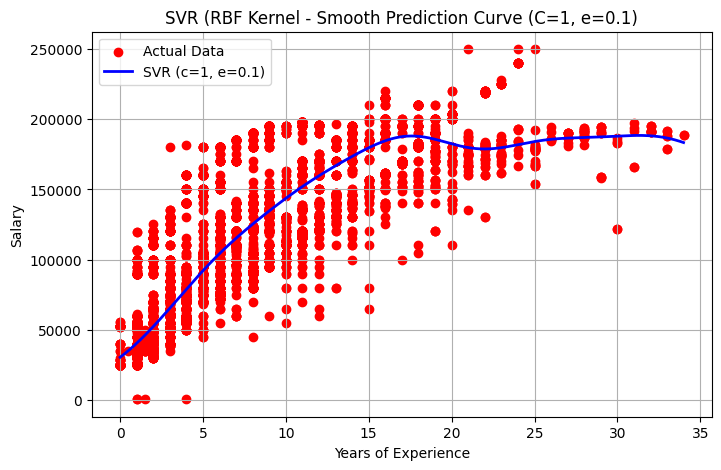

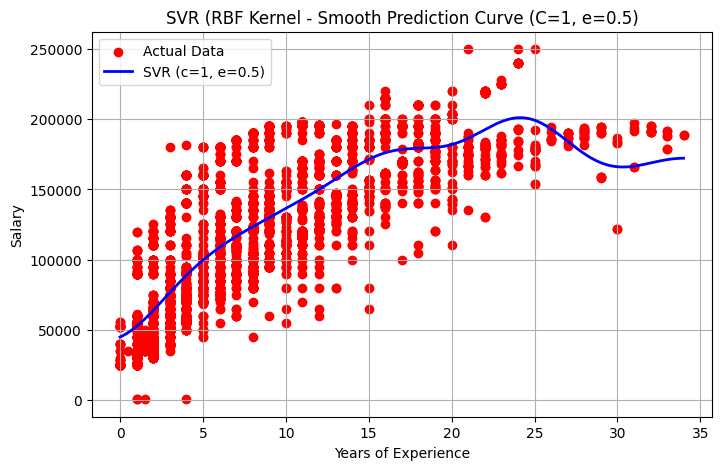

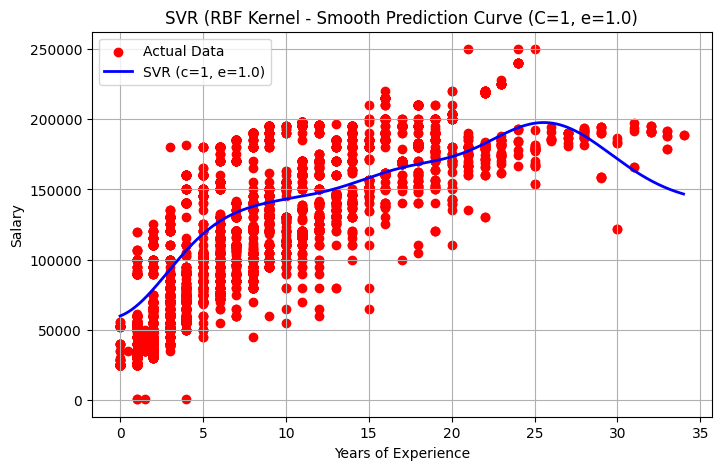

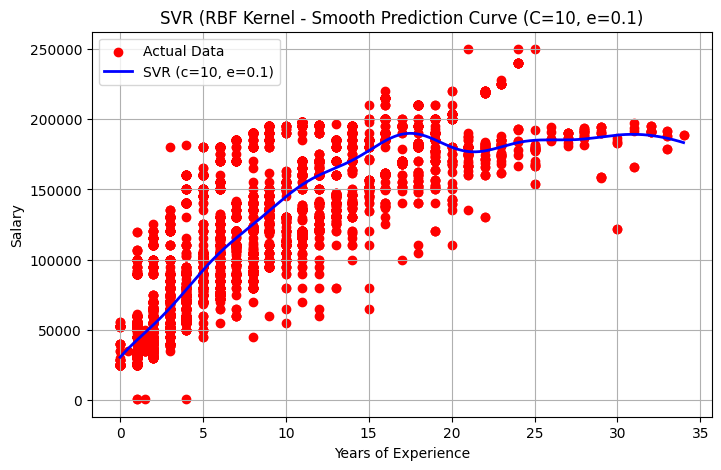

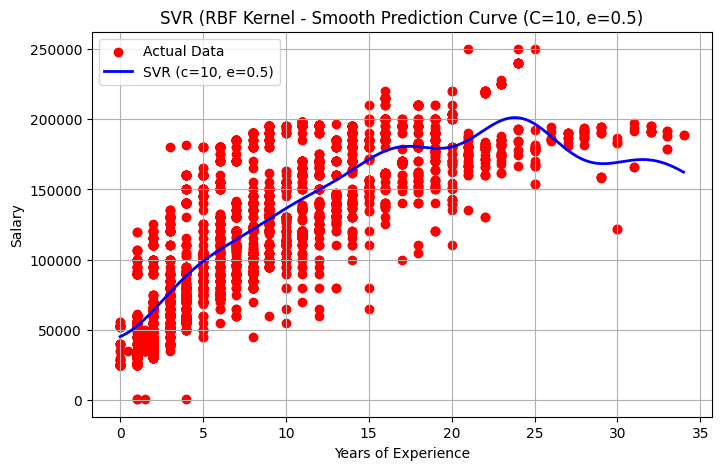

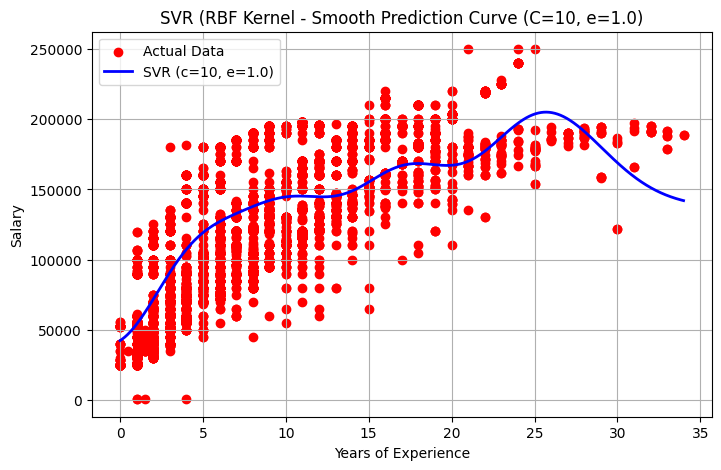

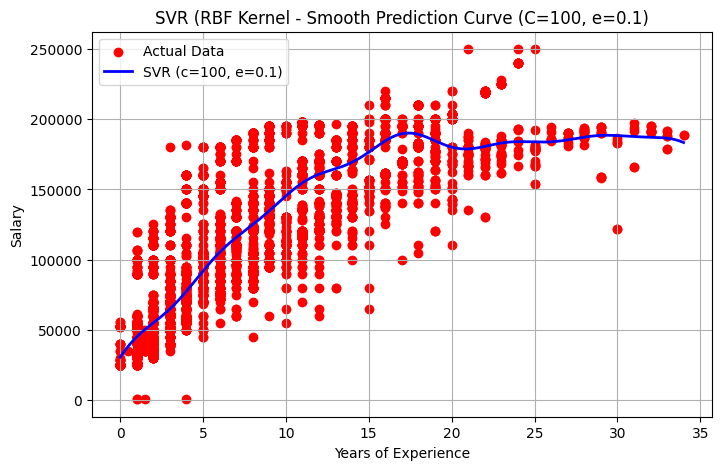

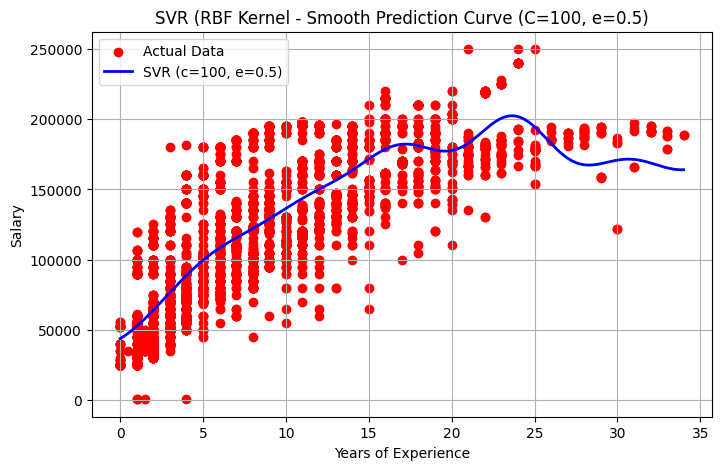

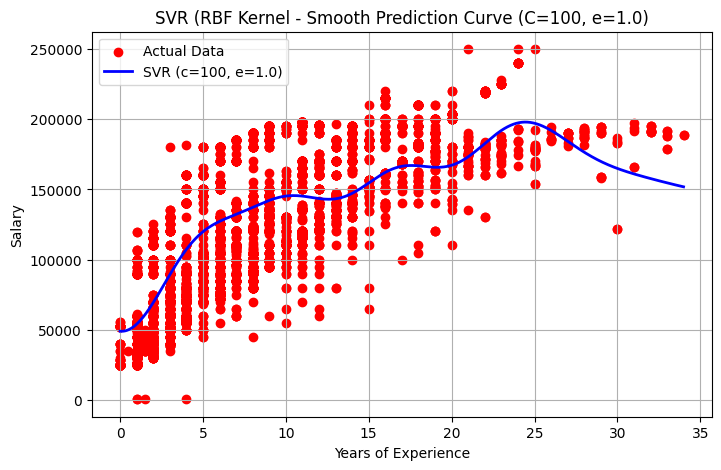

In [25]:
C_values=[1,10,100]
epsilon_values=[0.1,0.5,1.0]

X_grid=np.arange(min(X.ravel()),max(X.ravel()),0.01)
X_grid=X_grid.reshape(-1,1)

X_grid_scaled=sc_x.transform(X_grid)
for C in C_values:
    for epsilon in epsilon_values:
        model=SVR(kernel='rbf',C=C,epsilon=epsilon)
        model.fit(X_scaled,y_scaled)

        y_grid_scaled=model.predict(X_grid_scaled)
        y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

        plt.figure(figsize=(8,5))
        plt.scatter(X,y,color='red',label='Actual Data')
        plt.plot(X_grid,y_grid,color='blue',label=f'SVR (c={C}, e={epsilon})',linewidth=2)
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.title(f'SVR (RBF Kernel - Smooth Prediction Curve (C={C}, e={epsilon})')
        plt.grid(True)
        plt.legend()
        plt.show()